# Regression 01 : Cars


#### 실습목표 I<br>
    Linear Regression 을 이해하고 사용해본다.

#### 실습목표 II<br>
    Pandas 라이브러리로 csv 파일을 불러오고, 전처리할 수 있다.
    Pandas로 전처리한 파일을 Numpy array로 바꿀 수 있다.
    Scikit-learn을 통해 간단히 머신러닝을 사용해볼 수 있다.

#### 머신러닝 코드 구조 <br>

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")


## 00 환경준비

### 01.Import

In [10]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


### 02.data loading

In [11]:
data_path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/cars.csv'
data = pd.read_csv(data_path)

데이터 설명 : https://github.com/DA4BAM/dataset/blob/master/cars.md

## 10.데이터 이해

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

### 11.둘러보기

In [3]:
# 상/하위 몇개 행을 살펴 봅시다.
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
# 각 칼럼의 타입을 살펴 봅시다.

data.dtypes

speed    int64
dist     int64
dtype: object

In [5]:
# 행, 열의 개수를 살펴 봅시다.

data.shape

(50, 2)

### 12.기초통계량

In [6]:
# 숫자형 변수들의 통계량을 살펴 봅니다.
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [7]:
# 각 변수별 NaN 현황 파악하기
data.isnull().sum()

speed    0
dist     0
dtype: int64

### 13.탐색하기

[matplotlib 기본을 잘 설명한 곳](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)

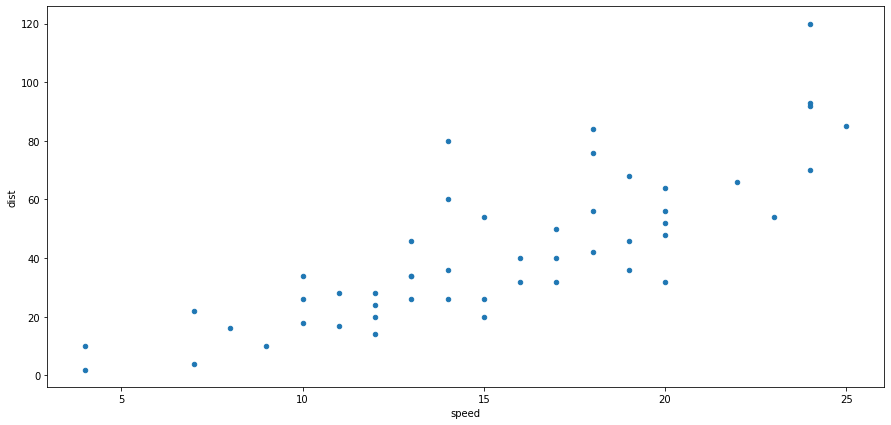

In [9]:
# 차트를 그려봅시다.
data.plot.scatter(x='speed', y='dist', figsize = (15,7))
plt.show()

In [ ]:
# 위 차트에서 무엇이 보이나요?



## 20.데이터 준비

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

### 21.변수 정리

### 22.NA 처리

### 23.Feature Engineering

### 24.Dummy Variable

익혀야 할 방법들
pd.get_dummies, pd.concat, (Pandas Dataframe).drop

### 25.Data Split

sklearn의 데이터 분할 함수를 사용해 봅시다.

* 요인, x, feature, 조작변수, 통제변수, 리스크백터, Input, (독립변수)
* 결과, y, target, label, Output, (종속변수)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# features와 target 분리
X = data.drop('dist', axis=1)
y = data.iloc[:, 1]

In [14]:
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [15]:
# 전체에서 train : test = 7 : 3
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
train_x.shape

(35, 1)

### 26.Scaling features


### 27. Pandas Dataframe to Numpy array

## 30.모델링

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")


### 31.import

In [17]:
# 모델링용
from sklearn.linear_model import LinearRegression

# 회귀모델 평가용 matrix
from sklearn.metrics import mean_squared_error

### 32.모델선언

In [18]:
# 모델 준비
simple_regression = LinearRegression()


### 33.모델링(학습)

In [19]:
# 모델 training : 
simple_regression.fit(train_x, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 34.예측

In [20]:
# 예측값을 뽑자.
test_pred = simple_regression.predict(test_x)


### 35.평가

In [21]:
# MSE
mean_squared_error(test_y, test_pred)

326.66136933971904

In [25]:
# RMSE
mean_squared_error(test_y, test_pred, squared=False)

18.07377573557111

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, test_pred)

15.113442990354988

### 결과 시각화

결과를 시각적으로 볼 수 있는 모델은 드믄 일입니다.

In [ ]:
simple_regression.

In [22]:
# 회귀계수 가져오기
print(simple_regression.coef_, simple_regression.intercept_)

[3.91046344] -16.37336414935767


In [23]:
# 회귀계수 가져오기 again
a = simple_regression.coef_
b = simple_regression.intercept_

# x값 : 범위 내 임의의 숫자들
# y : 선형회귀식의 결과
x = np.linspace(test_x.min(), test_x.max()) # 1차원
y = a * x + b  # 2차원

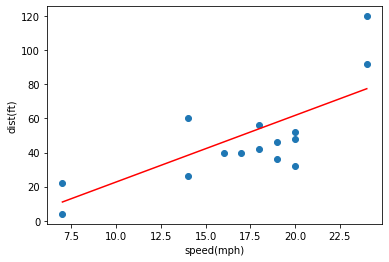

In [24]:
# 시각화 해서 결과를 살펴보자.

# 시각화해서 봅시다.
plt.scatter(test_x, test_y)
plt.plot(x , y , color = 'r')
plt.xlabel('speed(mph)')
plt.ylabel('dist(ft)')
plt.show()

In [ ]:
# test한 결과를 볼때 직선은 값들을 잘 설명하고 있나요?



In [ ]:
# target값들의 평균 선을 추가해 봅시다.
y2 = 0 * x + test_y.mean()

plt.scatter(test_x, test_y)
plt.plot(x , y , color = 'r')
plt.plot(x , y2 , color = 'y')

plt.xlabel('speed(mph)')
plt.ylabel('dist(ft)')
plt.show()

In [ ]:
# 평균선은 무엇을 의미할까요?



In [ ]:
# 평균선보다 모델은 더 나은 설명을 하고 있나요?


